In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
uselog = pd.read_csv('./use_log.csv')
print(len(uselog))
uselog.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [4]:
customer = pd.read_csv('./customer_master.csv')
print(len(customer))
customer.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [5]:
class_master = pd.read_csv('./class_master.csv')
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [6]:
campaign_master = pd.read_csv('./campaign_master.csv')
print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


In [7]:
customer_join = pd.merge(customer, class_master, on='class', how='left')
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000
...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,オールタイム,10500
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0,オールタイム,10500
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0,ナイト,6000
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,オールタイム,10500


In [8]:
customer_join = pd.merge(customer_join, campaign_master, on='campaign_id', how='left')
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000,通常


In [9]:
len(customer_join)

4192

In [10]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

In [12]:
customer_join.groupby('class_name').count()['customer_id']

class_name
オールタイム    2045
デイタイム     1019
ナイト       1128
Name: customer_id, dtype: int64

In [14]:
customer_join.groupby('campaign_name').count()['customer_id']

campaign_name
入会費半額     650
入会費無料     492
通常       3050
Name: customer_id, dtype: int64

In [15]:
customer_join.groupby('gender').count()['customer_id']

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [16]:
customer_join.groupby('is_deleted').count()['customer_id']

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [17]:
customer_join[customer_join['is_deleted'] == 0].groupby('gender').count()['customer_id']

gender
F    1352
M    1490
Name: customer_id, dtype: int64

In [18]:
customer_join[customer_join['is_deleted'] == 0].groupby('campaign_name').count()['customer_id']

campaign_name
入会費半額     282
入会費無料     219
通常       2341
Name: customer_id, dtype: int64

In [19]:
customer_join[customer_join['is_deleted'] == 0].groupby('class_name').count()['customer_id']

class_name
オールタイム    1381
デイタイム      675
ナイト        786
Name: customer_id, dtype: int64

In [25]:
customer_join['start_date'] = pd.to_datetime(customer_join['start_date'])
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,ナイト,6000,通常
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaN,CA1,0,オールタイム,10500,通常
4188,HD246549,XXXXX,C01,F,2019-03-14,NaN,CA1,0,オールタイム,10500,通常
4189,GD037007,XXXXX,C03,M,2019-03-14,NaN,CA1,0,ナイト,6000,通常
4190,OA953150,XXXXX,C01,M,2019-03-14,NaN,CA1,0,オールタイム,10500,通常


In [28]:
customer_start = customer_join.loc[customer_join['start_date'] > pd.to_datetime('20180401')]
customer_start

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
2831,HI195873,XXX,C01,F,2018-04-02,2018-08-31 00:00:00,CA3,1,オールタイム,10500,入会費無料
2832,TS322485,XX,C03,F,2018-04-02,2018-08-31 00:00:00,CA3,1,ナイト,6000,入会費無料
2833,IK552971,XXXXX,C02,F,2018-04-02,2018-08-31 00:00:00,CA3,1,デイタイム,7500,入会費無料
2834,PL000560,XXX,C01,M,2018-04-02,2018-07-31 00:00:00,CA3,1,オールタイム,10500,入会費無料
2835,HD218970,XXXXX,C01,F,2018-04-02,2018-11-30 00:00:00,CA3,1,オールタイム,10500,入会費無料
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaN,CA1,0,オールタイム,10500,通常
4188,HD246549,XXXXX,C01,F,2019-03-14,NaN,CA1,0,オールタイム,10500,通常
4189,GD037007,XXXXX,C03,M,2019-03-14,NaN,CA1,0,ナイト,6000,通常
4190,OA953150,XXXXX,C01,M,2019-03-14,NaN,CA1,0,オールタイム,10500,通常


In [31]:
len(customer_start[customer_start['is_deleted'] == 1])

645

In [35]:
customer_start['end_date']

2831    2018-08-31 00:00:00
2832    2018-08-31 00:00:00
2833    2018-08-31 00:00:00
2834    2018-07-31 00:00:00
2835    2018-11-30 00:00:00
               ...         
4187                    NaN
4188                    NaN
4189                    NaN
4190                    NaN
4191                    NaN
Name: end_date, Length: 1361, dtype: object

In [37]:
customer_join['end_date'] = pd.to_datetime(customer_join['end_date'])

In [42]:
customer_newer = customer_join.loc[(customer_join['end_date'] >= pd.to_datetime('20190331'))|customer_join['end_date'].isna()]
customer_newer

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,オールタイム,10500,通常
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,ナイト,6000,通常
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常


In [43]:
customer_newer['end_date'].unique()

<DatetimeArray>
['NaT', '2019-03-31 00:00:00']
Length: 2, dtype: datetime64[ns]

In [45]:
customer_join.loc[(customer_join['end_date'] >= pd.to_datetime('20190331'))]

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
1558,AS771307,XXXXX,C02,F,2017-04-01,2019-03-31,CA1,1,デイタイム,7500,通常
1872,AS430089,XXXXX,C01,M,2017-07-01,2019-03-31,CA2,1,オールタイム,10500,入会費半額
1891,TS205765,XX,C01,F,2017-07-01,2019-03-31,CA2,1,オールタイム,10500,入会費半額
2069,HI631124,XXXXX,C01,F,2017-09-01,2019-03-31,CA1,1,オールタイム,10500,通常
2236,IK823588,XXXX,C01,F,2017-11-01,2019-03-31,CA1,1,オールタイム,10500,通常
...,...,...,...,...,...,...,...,...,...,...,...
4027,AS484213,XXXXX,C02,F,2019-01-12,2019-03-31,CA1,1,デイタイム,7500,通常
4050,GD367382,XXXX,C01,M,2019-01-15,2019-03-31,CA1,1,オールタイム,10500,通常
4068,OA034442,XXXXX,C02,M,2019-02-05,2019-03-31,CA1,1,デイタイム,7500,通常
4086,PL508278,XXXXX,C03,M,2019-02-09,2019-03-31,CA1,1,ナイト,6000,通常


In [47]:
customer_newer.groupby('class_name').count()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,price,campaign_name
class_name,,,,,,,,,,
オールタイム,1444,1444,1444,1444,1444,63,1444,1444,1444,1444
デイタイム,696,696,696,696,696,21,696,696,696,696
ナイト,813,813,813,813,813,27,813,813,813,813


In [48]:
customer_newer.groupby('campaign_name').count()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price
campaign_name,,,,,,,,,,
入会費半額,311,311,311,311,311,29,311,311,311,311
入会費無料,242,242,242,242,242,23,242,242,242,242
通常,2400,2400,2400,2400,2400,59,2400,2400,2400,2400


In [53]:
customer_newer.groupby('gender').count()['customer_id']

gender
F    1400
M    1553
Name: customer_id, dtype: int64

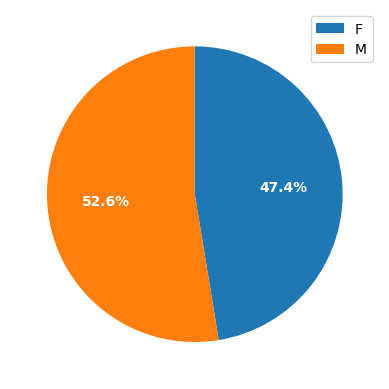

In [60]:
plt.pie(customer_newer.groupby('gender').count()['customer_id'],
        counterclock=False,
        autopct=lambda f: '{:.1f}%'.format(f),
        startangle=90, textprops={'color': 'white', 'weight': 'bold'})
plt.legend(['F','M'])
plt.show()

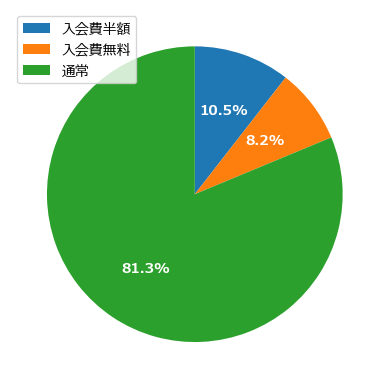

In [65]:
from matplotlib import rcParams
rcParams["font.family"] = "sans-serif"

plt.pie(customer_newer.groupby('campaign_name').count()['customer_id'],
        counterclock=False,
        autopct=lambda f: '{:.1f}%'.format(f),
        startangle=90, textprops={'color': 'white', 'weight': 'bold'})
plt.legend(['入会費半額','入会費無料','通常'])
plt.show()

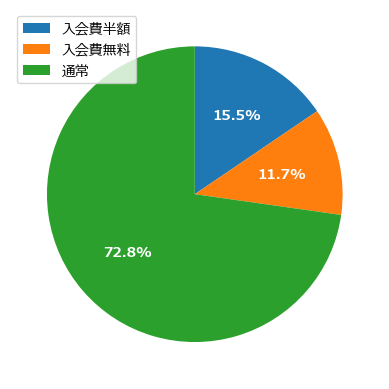

In [66]:
plt.pie(customer_join.groupby('campaign_name').count()['customer_id'],
        counterclock=False,
        autopct=lambda f: '{:.1f}%'.format(f),
        startangle=90, textprops={'color': 'white', 'weight': 'bold'})
plt.legend(['入会費半額','入会費無料','通常'])
plt.show()

In [72]:
customer_join[customer_join['campaign_name'] == '入会費半額']['start_date'].max()

Timestamp('2018-06-15 00:00:00')

In [74]:
customer_join[customer_join['campaign_name'] == '入会費無料']['start_date'].min()

Timestamp('2017-12-01 00:00:00')

In [79]:
customer_newer

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,オールタイム,10500,通常
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,ナイト,6000,通常
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常


In [80]:
uselog['usedate'] = pd.to_datetime(uselog['usedate'])

In [84]:
len(uselog)

197428

In [90]:
uselog['年月'] = uselog['usedate'].dt.strftime("%Y%m")
uselog_months = uselog.groupby(['年月', 'customer_id'], as_index=False).count()
uselog_months

,年月,customer_id,log_id,usedate
0,201804,AS002855,4,4
1,201804,AS009013,2,2
2,201804,AS009373,3,3
3,201804,AS015315,6,6
4,201804,AS015739,7,7
...,...,...,...,...
36837,201903,TS995853,8,8
36838,201903,TS998593,8,8
36839,201903,TS999079,3,3
36840,201903,TS999231,6,6


In [99]:
uselog_months.rename(columns={"log_id": "count"}, inplace=True)
del uselog_months['usedate']

In [100]:
uselog_customer = uselog_months.groupby('customer_id').agg({'count': ['mean', 'median', 'max', 'min']})
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer

customer_id     count               
                      mean median max min
0       AS002855  4.500000    5.0   7   2
1       AS008805  4.000000    4.0   8   1
2       AS009013  2.000000    2.0   2   2
3       AS009373  5.083333    5.0   7   3
4       AS015233  7.545455    7.0  11   4
...          ...       ...    ...  ..  ..
4187    TS995853  9.500000    9.5  11   8
4188    TS998593  8.142857    8.0   9   7
4189    TS999079  4.916667    5.5   9   2
4190    TS999231  4.666667    5.0   8   1
4191    TS999855  4.583333    4.0   7   3

[4192 rows x 5 columns]

In [108]:
# Series.dt.weekday[source]
# The day of the week with Monday=0, Sunday=6.
uselog['weekday'] = uselog['usedate'].dt.weekday

In [109]:
uselog_weekday = uselog.groupby(['customer_id', '年月', 'weekday'], as_index=False).count()
uselog_weekday.rename(columns={'log_id': 'count'}, inplace=True)
uselog_weekday

,customer_id,年月,weekday,count,usedate
0,AS002855,201804,5,4,4
1,AS002855,201805,2,1,1
2,AS002855,201805,5,4,4
3,AS002855,201806,5,5,5
4,AS002855,201807,1,1,1
...,...,...,...,...,...
93328,TS999855,201901,1,1,1
93329,TS999855,201901,5,4,4
93330,TS999855,201901,6,1,1
93331,TS999855,201902,5,4,4


In [116]:
uselog_weekday = uselog_weekday.groupby('customer_id', as_index=False).max()
uselog_weekday['routine_flg'] = 0

# Where cond is True, keep the original value. Where False, replace with corresponding value from other.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html
uselog_weekday['routine_flg'] = uselog_weekday['routine_flg'].where(uselog_weekday['count'] < 4, 1)
uselog_weekday

,customer_id,年月,weekday,count,usedate,routine_flg
0,AS002855,201903,6,5,5,1
1,AS008805,201903,6,4,4,1
2,AS009013,201804,0,2,2,0
3,AS009373,201903,6,5,5,1
4,AS015233,201903,6,5,5,1
...,...,...,...,...,...,...
4187,TS995853,201903,6,5,5,1
4188,TS998593,201903,6,5,5,1
4189,TS999079,201903,6,5,5,1
4190,TS999231,201903,6,5,5,1


In [178]:
customer_join = pd.merge(customer_join, uselog_weekday[['customer_id', 'routine_flg']], on='customer_id', how='left')
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,0
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,0
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,ナイト,6000,通常,0
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,0


In [220]:
customer_join = pd.merge(customer_join, uselog_customer, on='customer_id', how='left')
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,routine_flg,mean,median,max,min
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,1,4.833333,5.0,8,2
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,1,5.083333,5.0,7,3
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,1,4.583333,5.0,6,3
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,1,4.833333,4.5,7,2
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,1,3.916667,4.0,6,1


In [224]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
routine_flg         0
mean                0
median              0
max                 0
min                 0
dtype: int64

In [227]:
from dateutil.relativedelta import relativedelta

customer_join['calc_date'] = customer_join['end_date']
customer_join['calc_date'] = customer_join['calc_date'].fillna(pd.to_datetime('20190430'))
customer_join['membership_period'] = 0

for i in range(len(customer_join)):
    delta = relativedelta(customer_join['calc_date'].iloc[i], customer_join['start_date'].iloc[i])
    # 月数の合計を単位にしてメンバー期間を計算する
    customer_join.loc[i, 'membership_period'] = delta.years * 12 + delta.months

customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,routine_flg,mean,median,max,min,member_span,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,1,4.833333,5.0,8,2,2019-04-30,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,1,5.083333,5.0,7,3,2019-04-30,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,1,4.583333,5.0,6,3,2019-04-30,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,1,4.833333,4.5,7,2,2019-04-30,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,1,3.916667,4.0,6,1,2019-04-30,2019-04-30,47


In [237]:
customer_join[['mean','median','max','min']].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [238]:
# 定期的に利用しているユーザーの方が多い。
customer_join.groupby('routine_flg').count()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,member_span,calc_date,membership_period
routine_flg,,,,,,,,,,,,,,,,,,
0,779,779,779,779,779,734,779,779,779,779,779,779,779,779,779,779,779,779
1,3413,3413,3413,3413,3413,616,3413,3413,3413,3413,3413,3413,3413,3413,3413,3413,3413,3413


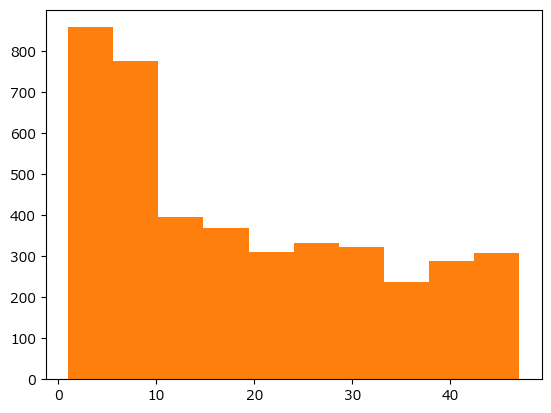

In [240]:
plt.hist(customer_join['membership_period'])
plt.show()

In [248]:
leave_customer = customer_join.loc[customer_join['is_deleted'] == 1]
leave_customer[['price','routine_flg','mean','median','max','min','membership_period']].describe()

,price,routine_flg,mean,median,max,min,membership_period
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,8595.555556,0.456296,3.865474,3.621852,6.461481,1.821481,8.026667
std,1949.163652,0.498271,1.246385,1.270847,2.584021,0.976361,5.033692
min,6000.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6000.000000,0.000000,3.000000,3.000000,4.000000,1.000000,4.000000
50%,7500.000000,0.000000,4.000000,4.000000,7.000000,2.000000,7.000000
75%,10500.000000,1.000000,4.666667,4.500000,8.000000,2.000000,11.000000
max,10500.000000,1.000000,9.000000,9.000000,13.000000,8.000000,23.000000


In [247]:
leave_customer = customer_join.loc[customer_join['is_deleted'] == 0]
leave_customer[['price','routine_flg','mean','median','max','min','membership_period']].describe()

,price,routine_flg,mean,median,max,min,membership_period
count,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,8542.927516,0.984166,6.030288,6.024279,8.471147,3.620690,23.970443
std,1977.189779,0.124855,1.553587,1.599765,1.571048,2.030488,13.746761
min,6000.000000,0.000000,3.166667,3.000000,5.000000,1.000000,1.000000
25%,6000.000000,1.000000,4.833333,5.000000,7.000000,2.000000,12.000000
50%,7500.000000,1.000000,5.583333,5.500000,8.000000,3.000000,24.000000
75%,10500.000000,1.000000,7.178030,7.000000,10.000000,5.000000,35.000000
max,10500.000000,1.000000,12.000000,12.000000,14.000000,12.000000,47.000000


In [249]:
customer_join.to_csv('customer_join.csv', index=False)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,routine_flg,mean,median,max,min,calc_date,membership_period
708,TS511179,XXXXXX,C01,F,2016-05-01,2018-04-30,CA1,1,オールタイム,10500,通常,0,3.0,3.0,3,3,2018-04-30,23
729,TS443736,XXXX,C02,M,2016-05-01,2018-04-30,CA1,1,デイタイム,7500,通常,0,3.0,3.0,3,3,2018-04-30,23
730,HD542886,XX,C01,M,2016-05-01,2018-04-30,CA1,1,オールタイム,10500,通常,0,1.0,1.0,1,1,2018-04-30,23
770,HD597545,XXXXX,C03,F,2016-06-01,2018-05-31,CA1,1,ナイト,6000,通常,1,3.5,3.5,4,3,2018-05-31,23
785,HI749296,XXXXX,C01,M,2016-06-01,2018-05-31,CA1,1,オールタイム,10500,通常,0,3.0,3.0,3,3,2018-05-31,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4049,OA143589,XXXXX,C03,F,2019-01-15,2019-02-28,CA1,1,ナイト,6000,通常,0,4.5,4.5,6,3,2019-02-28,1
4050,GD367382,XXXX,C01,M,2019-01-15,2019-03-31,CA1,1,オールタイム,10500,通常,0,7.0,6.0,12,3,2019-03-31,2
4068,OA034442,XXXXX,C02,M,2019-02-05,2019-03-31,CA1,1,デイタイム,7500,通常,0,7.0,7.0,11,3,2019-03-31,1
4086,PL508278,XXXXX,C03,M,2019-02-09,2019-03-31,CA1,1,ナイト,6000,通常,0,7.0,7.0,10,4,2019-03-31,1
